Reading Dataset

In [6]:
import xml.etree.ElementTree as ET
import pandas as pd
from datetime import datetime

# XML dosyasını okuma
def read_xml_data(file_path):
    # XML dosyasını yükle
    tree = ET.parse(file_path)
    root = tree.getroot()

    # Verileri saklamak için liste
    step_records = []

    # Adım kayıtlarını XML'den çıkarma
    for record in root.findall(".//Record[@type='HKQuantityTypeIdentifierStepCount']"):
        start_date = datetime.strptime(record.get('startDate'), '%Y-%m-%d %H:%M:%S %z')
        steps = int(record.get('value', 0))

        # Her kaydı listeye ekle
        step_records.append({
            'date': start_date.date(),
            'steps': steps
        })

    # DataFrame oluşturma
    df = pd.DataFrame(step_records)
    return df

# Günlük toplam adım sayısını hesaplama
def calculate_daily_steps(df):
    daily_steps = df.groupby('date')['steps'].sum().reset_index()
    return daily_steps

# Veriyi okuma ve işleme
file_path = 'export.xml'  # XML dosya yolunu buraya yazın
df = read_xml_data(file_path)
daily_steps = calculate_daily_steps(df)

# İlk birkaç satırı görüntüleme
print(daily_steps.head())


         date  steps
0  2017-07-16   2532
1  2017-07-17   1858
2  2017-07-18   1000
3  2017-07-19   1353
4  2017-07-20    467


Mothly AVG. Step Count

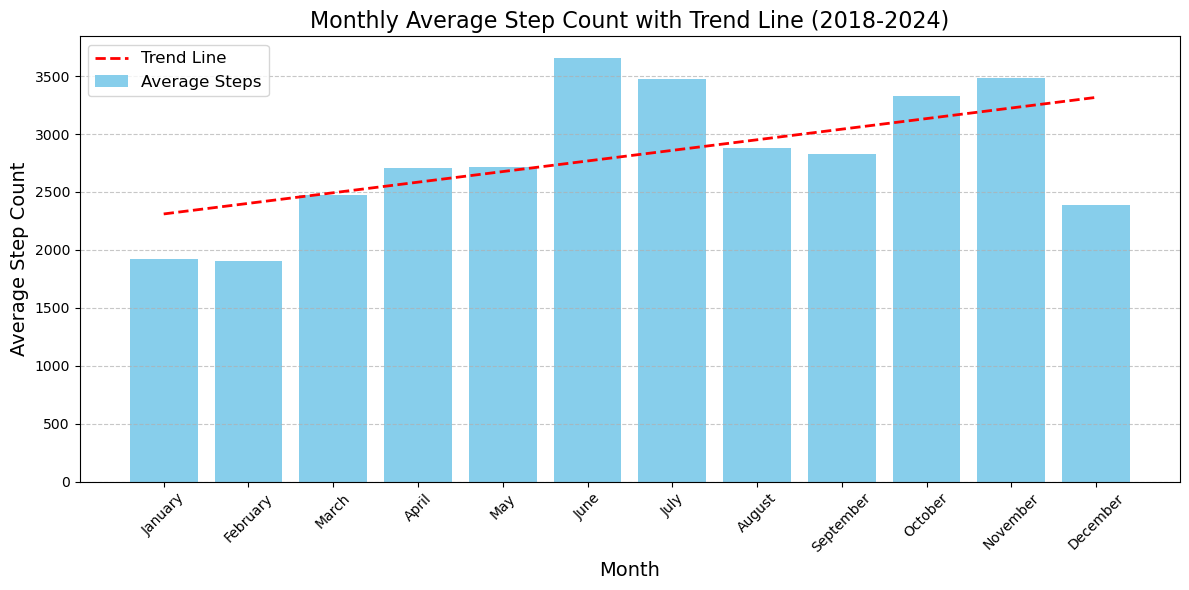

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aylık ortalama adım sayısını hesaplama
def calculate_monthly_average_steps(daily_steps):
    # Tarih sütununu datetime formatına çevirme
    daily_steps['date'] = pd.to_datetime(daily_steps['date'])
    
    # Tarih sütunundan yıl ve ay bilgilerini çıkarma
    daily_steps['year'] = daily_steps['date'].dt.year
    daily_steps['month'] = daily_steps['date'].dt.month
    
    # Yalnızca ay bilgisine göre gruplama, yılları dikkate almadan ortalama hesaplama
    monthly_avg_steps = (daily_steps
                         .groupby('month')['steps']
                         .mean()
                         .reset_index()
                         .rename(columns={'steps': 'avg_steps'}))
    
    return monthly_avg_steps

# Aylık ortalama adımları hesapla
monthly_avg_steps = calculate_monthly_average_steps(daily_steps)

# Ay isimlerini ekleme
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg_steps['month_name'] = monthly_avg_steps['month'].apply(lambda x: month_names[x - 1])

# X ekseni için sayısal değerler
x_numeric = np.arange(len(monthly_avg_steps))

# Trend çizgisini hesaplama
z = np.polyfit(x_numeric, monthly_avg_steps['avg_steps'], 1)  # Derece 1 polinom (doğrusal trend)
trend_line = np.poly1d(z)

# Grafik oluşturma
plt.figure(figsize=(12, 6))
plt.bar(monthly_avg_steps['month_name'], monthly_avg_steps['avg_steps'], color='skyblue', label='Average Steps')
plt.plot(monthly_avg_steps['month_name'], trend_line(x_numeric), color='red', linestyle='--', linewidth=2, label='Trend Line')

# Grafik detayları
plt.title('Monthly Average Step Count with Trend Line (2018-2024)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Step Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Grafiği göster
plt.tight_layout()
plt.show()

Yearly AVG. Step Count

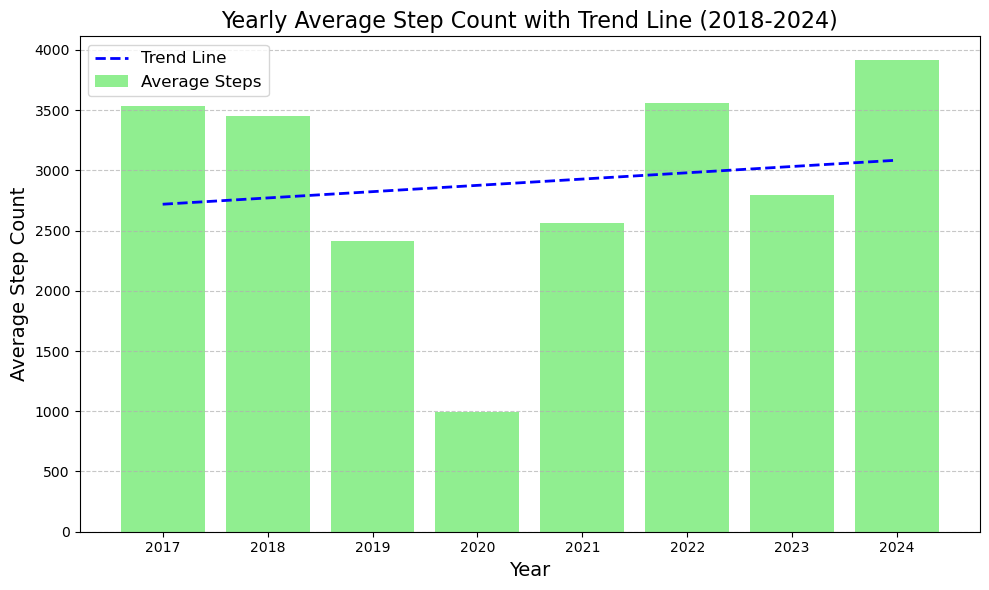

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Yıllık ortalama adım sayısını hesaplama
def calculate_yearly_average_steps(daily_steps):
    # Tarih sütununu datetime formatına çevirme
    daily_steps['date'] = pd.to_datetime(daily_steps['date'])
    
    # Tarih sütunundan yıl bilgilerini çıkarma
    daily_steps['year'] = daily_steps['date'].dt.year
    
    # Yıllara göre gruplama ve ortalama hesaplama
    yearly_avg_steps = (daily_steps
                        .groupby('year')['steps']
                        .mean()
                        .reset_index()
                        .rename(columns={'steps': 'avg_steps'}))
    
    return yearly_avg_steps

# Yıllık ortalama adımları hesapla
yearly_avg_steps = calculate_yearly_average_steps(daily_steps)

# X ekseni için sayısal değerler
x_numeric = np.arange(len(yearly_avg_steps))

# Trend çizgisini hesaplama
z = np.polyfit(x_numeric, yearly_avg_steps['avg_steps'], 1)  # Derece 1 polinom (doğrusal trend)
trend_line = np.poly1d(z)

# Grafik oluşturma
plt.figure(figsize=(10, 6))
plt.bar(yearly_avg_steps['year'], yearly_avg_steps['avg_steps'], color='lightgreen', label='Average Steps')
plt.plot(yearly_avg_steps['year'], trend_line(x_numeric), color='blue', linestyle='--', linewidth=2, label='Trend Line')

# Grafik detayları
plt.title('Yearly Average Step Count with Trend Line (2018-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Step Count', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Grafiği göster
plt.tight_layout()
plt.show()
